<a href="https://colab.research.google.com/github/ramboo1/RL/blob/main/ThompsonSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/Ads_Optimisation.csv')

In [4]:
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [10]:
import random

N = data.shape[0]
d = data.shape[1]
ads_selected = []
no_of_rewards_1 = [0] * d
no_of_rewards_0 = [0] * d
total_reward = 0

In [20]:
for n in range(N):
  ad = 0
  max_random_beta = 0
  for i in range(d):
    random_beta = random.betavariate(no_of_rewards_0[i] + 1, no_of_rewards_1[i] + 1)
    if random_beta > max_random_beta:
      max_random_beta = random_beta
      ad = i
  ads_selected.append(ad)
  reward = data.iloc[n, ad]
  if reward == 1:
    no_of_rewards_1[ad] += 1
  else:
    no_of_rewards_0[ad] += 1
  total_reward = total_reward + reward
print(total_reward, ads_selected)

1037 [3, 8, 3, 3, 6, 3, 4, 6, 3, 1, 3, 3, 9, 6, 3, 0, 9, 3, 6, 4, 4, 2, 1, 6, 4, 1, 5, 6, 6, 3, 6, 3, 6, 6, 1, 0, 7, 6, 3, 0, 1, 1, 0, 1, 0, 6, 1, 2, 1, 1, 6, 1, 6, 0, 6, 9, 6, 6, 0, 0, 2, 6, 3, 6, 7, 0, 7, 7, 5, 1, 3, 3, 2, 9, 7, 6, 7, 6, 6, 6, 6, 6, 7, 3, 1, 7, 5, 1, 3, 6, 7, 5, 7, 5, 5, 5, 6, 6, 7, 1, 1, 3, 2, 1, 6, 9, 1, 7, 9, 3, 9, 7, 5, 6, 7, 3, 9, 9, 0, 9, 0, 5, 1, 1, 1, 5, 1, 6, 5, 3, 6, 6, 5, 3, 1, 1, 6, 3, 7, 1, 1, 5, 5, 5, 7, 6, 5, 5, 9, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 2, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 9, 5, 5, 9, 5, 5, 5, 5

Text(0, 0.5, 'Number of times each ad was selected')

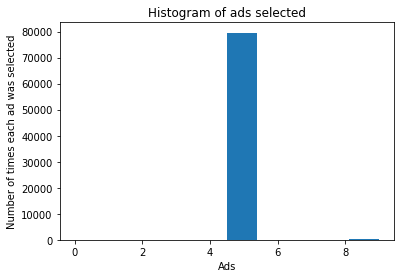

In [21]:
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')